In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Defining Location/Central tendency

In [2]:
df = pd.read_csv('state.csv')

In [3]:
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
df[['Population']].mean()

Population    6162876.3
dtype: float64

In [5]:
df[['Population']].median()

Population    4436369.5
dtype: float64

In [6]:
df['Population'].mean()

6162876.3

In [7]:
from scipy import stats
stats.trim_mean(df['Population'], 0.1)

4783697.125

In [8]:
import numpy as np

In [9]:
# weighted mean
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [10]:
# weighted median
import wquantiles as wq

wq.median(df['Murder.Rate'], weights=df['Population'])

4.4

### Variability

##### measure of the extent to which data is surrounding the central value i.e. tightly clustered or spread out.

In [11]:
# deviation is the difference of a value from estimate of location i.e. mean/median
## mean-absolute-deviation is the sum of absolute values of deviations divide by total number of values.

### variance is average of squared deviations
#### standard-deviation is the squared root of variance

In [12]:
# ***** Median-Absolute-Deviation-From-the-Median [MAD] is more robust estimate of variability than the threee above
# MAD = Median(|x1-m|, |x2-m|,...,|xn-m|)

In [13]:
### Perccentile[P] is a value such that P precent of values take on this value or less and [100-P] percent have this value or greater
### quantile is fractional percentile 80th  percentile=0.8 quantile

In [14]:
# IQR [Inter-Quartile-Range] = 75th percentile - 25th percentile

In [15]:
# standard deviation

df['Population'].std()

6848235.347401142

In [16]:
# IQR
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)

4847308.0

In [17]:
from statsmodels import robust

In [18]:
# median-absolute-deviation from median
robust.scale.mad(df['Population'])

3849876.1459979336

#### Estimates of Location

- Mean
- Median
- Trimmed Mean
- Trimmed Median
- Weighted Mean
- Weighted Median

#### Estimates of Variability

- Deviation
- Mean Absolute Deviation
- Standard Deviation
- Variance
- Percentile
- Quantile
- Inter Quantile Range
- Median Absolute Deviation from the Median

### Exploring the Data Distribution

In [19]:
# quantiles
df['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

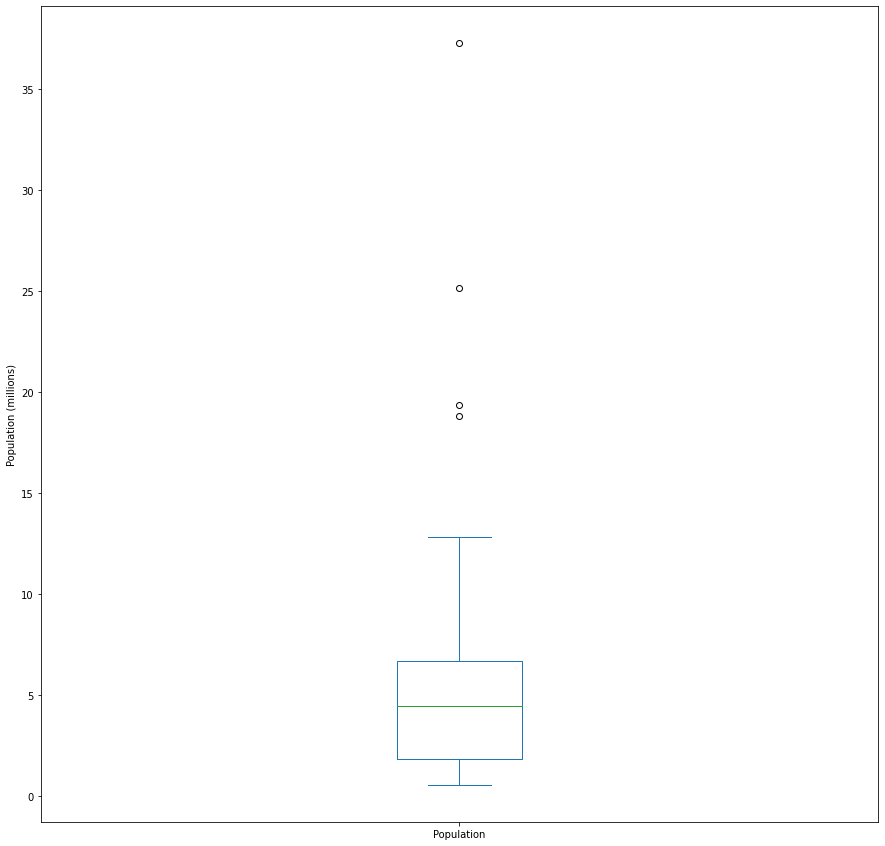

In [20]:
# boxplots are based on percentiles and quickly visualize data distribution

ax = (df['Population']/1000000).plot.box(figsize=(15,15))
ax.set_ylabel('Population (millions)')

In [21]:
# frequency table

binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [22]:
states = []

for i in binnedPopulation.value_counts().index:
    ss = []
    for j, k in zip(df['Population'], df['Abbreviation']):
        if j in i:
            ss.append(k)
    states.append(ss)

freq_dict = {
    'BinRange': binnedPopulation.value_counts().index,
    'Count': binnedPopulation.value_counts().values,
    'States': states
}
freq_table = pd.DataFrame(freq_dict)

In [23]:
freq_table

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"[AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, N..."
1,"(4232659.0, 7901692.0]",14,"[AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, T..."
2,"(7901692.0, 11570725.0]",6,"[GA, MI, NJ, NC, OH, VA]"
3,"(11570725.0, 15239758.0]",2,"[IL, PA]"
4,"(15239758.0, 18908791.0]",1,[FL]
5,"(18908791.0, 22577824.0]",1,[NY]
6,"(22577824.0, 26246857.0]",1,[TX]
7,"(33584923.0, 37253956.0]",1,[CA]
8,"(26246857.0, 29915890.0]",0,[]
9,"(29915890.0, 33584923.0]",0,[]


Text(0.5, 0, 'Population (millions)')

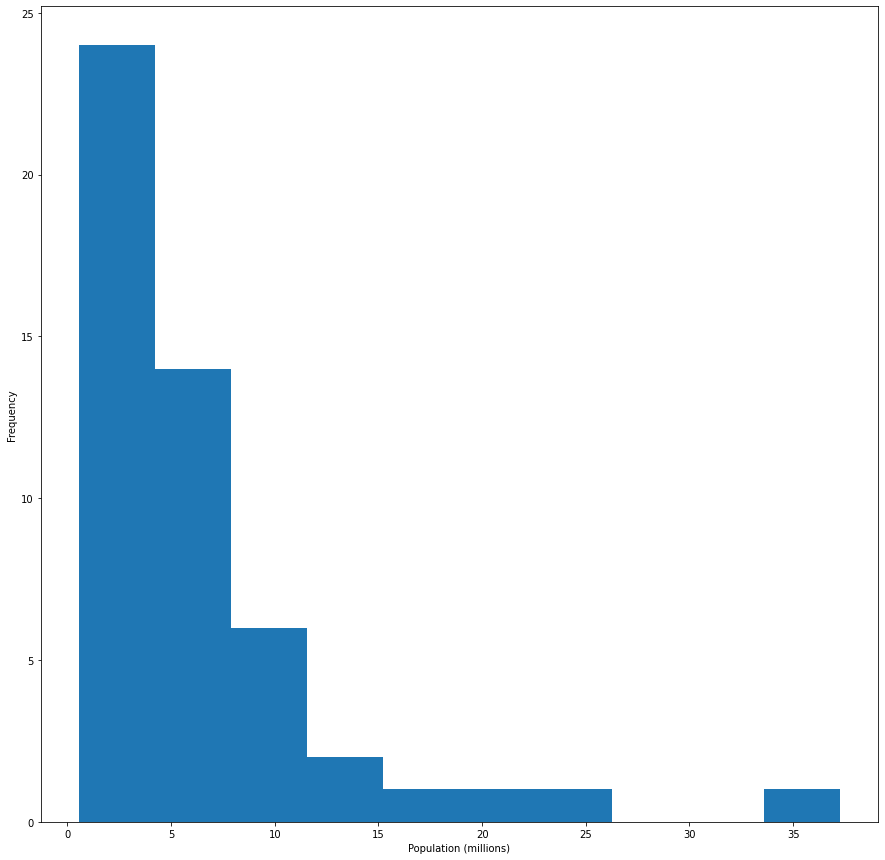

In [24]:
ax = (df['Population']/1000000).plot.hist(figsize=(15,15))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

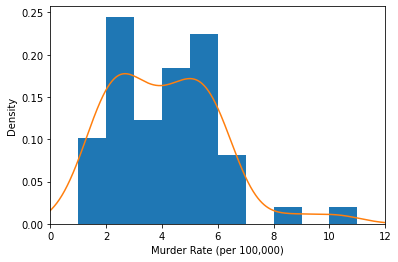

In [25]:
# density graph

ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

### Exploring Binary and Categorical Data

for categorical data simple proportions or percentages tell the story

In [26]:
dfw = pd.read_csv('dfw_airline.csv')

Text(0, 0.5, 'Count')

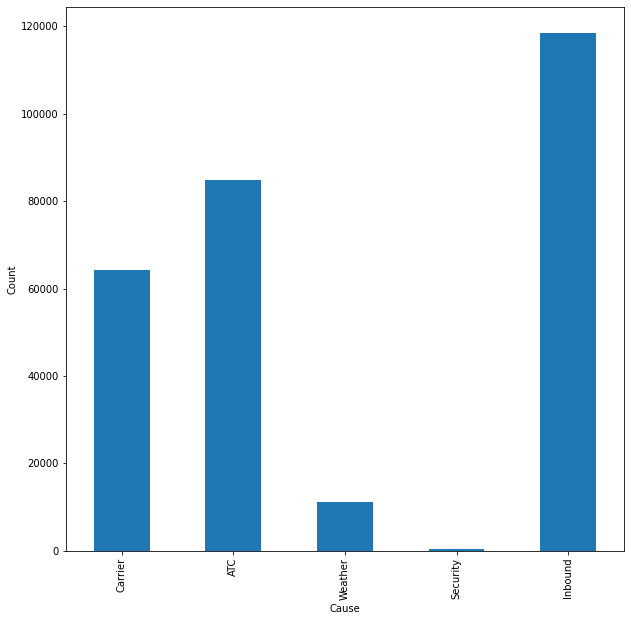

In [27]:
ax = dfw.transpose().plot.bar( figsize=(10,10) ,legend=False)
ax.set_xlabel('Cause')
ax.set_ylabel('Count')

In [28]:
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('sp500_sectors.csv')

In [29]:
sp500_px.head(5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [30]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]


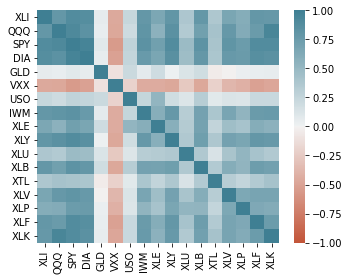

In [31]:
fig,ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3244/680353016.py:35: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


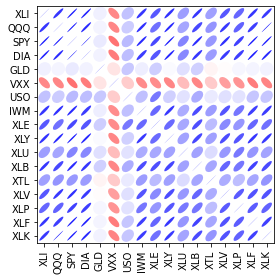

In [32]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize
import numpy as np

def plot_cor_elipses(data, figsize=None, **kwargs):
    M = np.array(data)
    if not M.ndim==2:
        raise ValueError('data must be 2D array')

    fig, ax = plt.subplots(1,1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()
    xy = np.indices(M.shape)[::-1].reshape(2,-1).T
    w = np.ones_like(M).ravel()+0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45*np.sign(M).ravel()


    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                            norm=Normalize(vmin=-1, vmax=1), transOffset=ax.transData,
                            array=M.ravel(), **kwargs)

    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_cor_elipses(etfs.corr(), figsize=(5,4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation Coefficient')

plt.tight_layout()
plt.show()

In [33]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


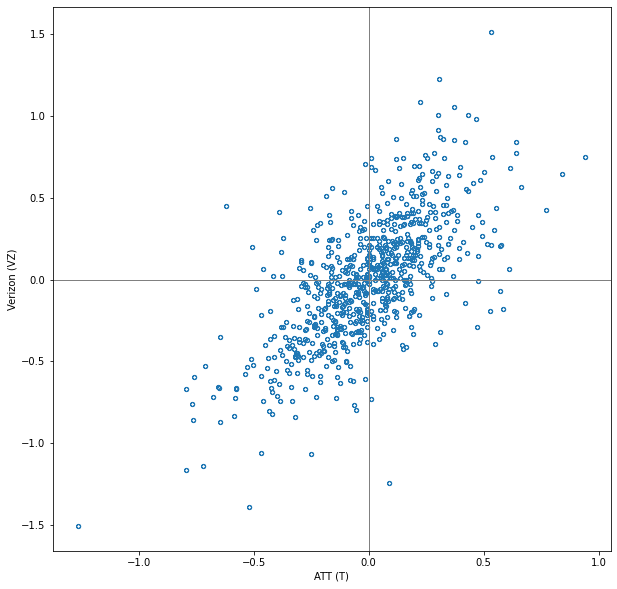

In [34]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(10,10), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

### Exploring Two or MOre Variables

#### multivariate analysis

In [35]:
kc_tax = pd.read_csv('kc_tax.csv.gz')

In [36]:
kc_tax.head(5)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [37]:
kc_tax0 = kc_tax.loc[
    (kc_tax.TaxAssessedValue < 750000) &
    (kc_tax.SqFtTotLiving > 100) &
    (kc_tax.SqFtTotLiving < 3500), :
]

kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

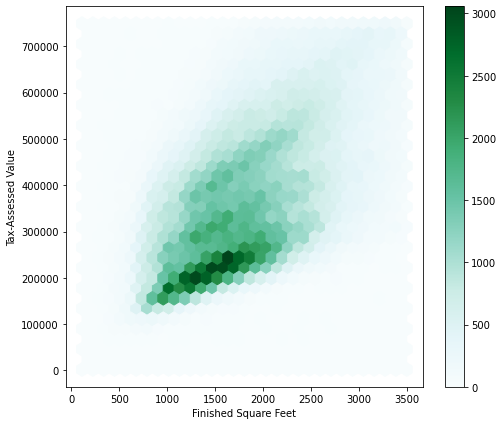

In [38]:
# hexagonal binning plot

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                            gridsize=30, sharex=False, figsize=(8,7))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [39]:
kc_tax0.shape

(432693, 3)

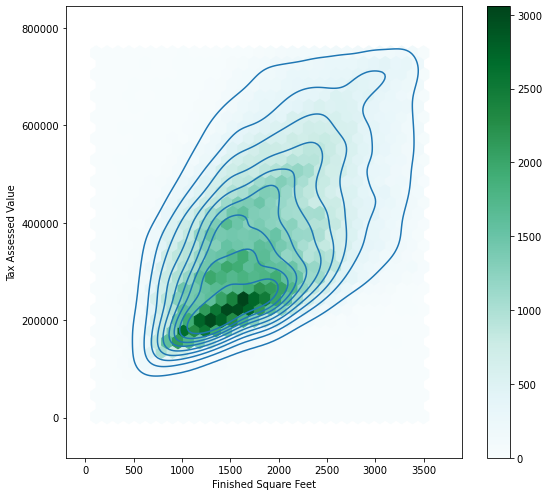

In [40]:
# contour plot
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
# sns.scatterplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                            gridsize=30, sharex=False, figsize=(8,7), ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

#### Two Categorical Variable

In [42]:
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [45]:
# contigency table
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [47]:
#use percentages
df = crosstab.loc['A':'G',:].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All']/sum(df['All'])
perc_crosstab = df

In [48]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### Categorical and Numerical Data

In [49]:
airline_stats = pd.read_csv('airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


daily fligh delay %age


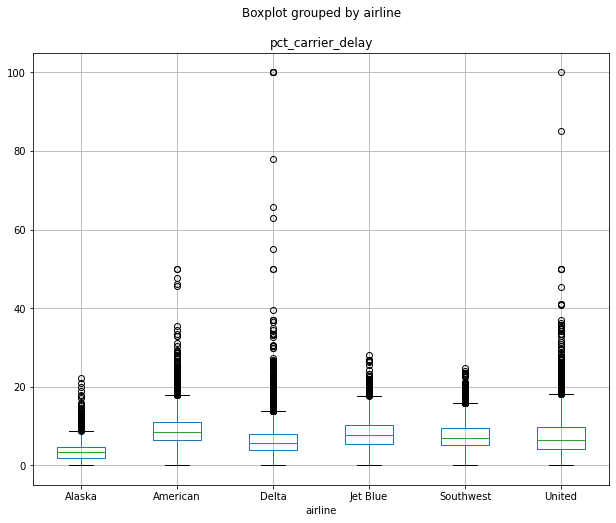

In [52]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(10,8))
print('daily fligh delay %age')

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


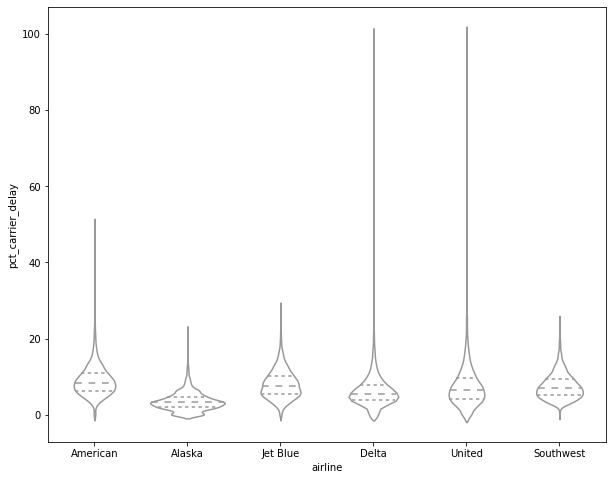

In [56]:
# voilin plot
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner='quartile', color='white', ax=ax)

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'pct_carrier_delay'}, xlabel='airline', ylabel='pct_carrier_delay'>

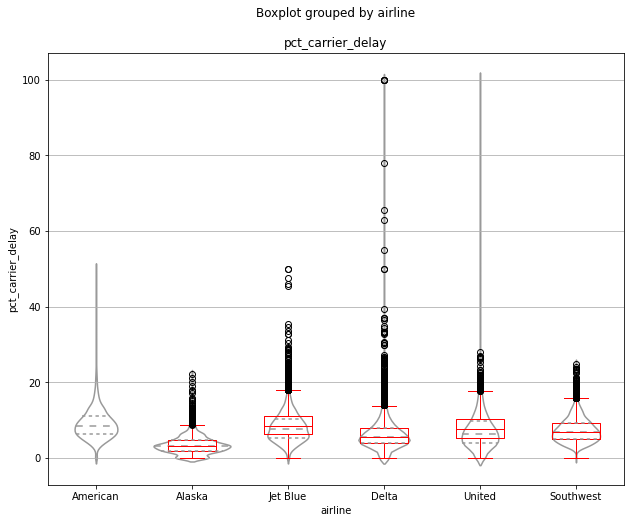

In [61]:
# voilin plot with boxplot
fig, ax = plt.subplots(figsize=(10,8))
airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(20,17), ax=ax, color='red')
sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner='quartile', color='white', ax=ax)


### Visualizing Multiple Variables

In [62]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip


,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


In [63]:

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)


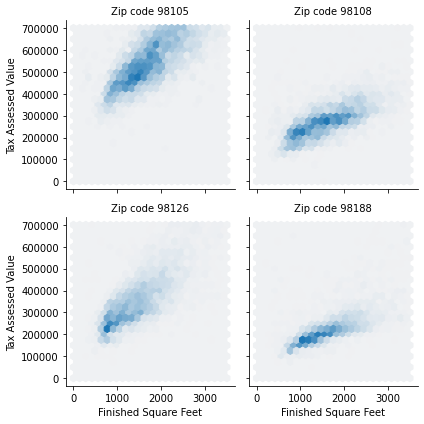

In [64]:

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

- Hexagonal binning and contour plots are useful tools that permit graphical
examination of two numeric variables at a time, without being overwhelmed by
huge amounts of data.
- Contingency tables are the standard tool for looking at the counts of two catego‐
rical variables.
- Boxplots and violin plots allow you to plot a numeric variable against a categori‐
cal variable.